# Simple Housing Dataset
Create a regression model that predicts the price of boston house

In [0]:
!wget https://storage.googleapis.com/nicksdemobucket/housing-data.csv

--2019-06-05 01:51:42--  https://storage.googleapis.com/nicksdemobucket/housing-data.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 816 [application/octet-stream]
Saving to: ‘housing-data.csv.3’

housing-data.csv.3  100%[===================>]     816  --.-KB/s    in 0s      

2019-06-05 01:51:43 (14.1 MB/s) - ‘housing-data.csv.3’ saved [816/816]



In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
import pandas as pd

housing_df = pd.read_csv('housing-data.csv')
housing_df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
sqft,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
bdrms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
age,47.0,42.744681,22.873440,5.0,24.5,44.0,61.5,79.0
price,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


Describe to quickly inspect data
- price and sqft are continuous
- bdrms and age are discrete

Normalize the continuous feature 'sqft'.

In [0]:
from sklearn import preprocessing

housing_df['sqft_norm'] = preprocessing.scale(housing_df['sqft'])

In [0]:
housing_df['age_norm'] = preprocessing.scale(housing_df['age'])

In [0]:
housing_df.bdrms.unique()

array([3, 2, 4, 5, 1])

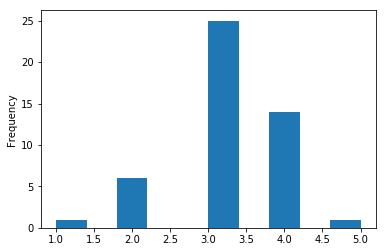

In [0]:
import matplotlib.pyplot as plt
housing_df['bdrms'].plot.hist();

In [0]:
housing_df = pd.concat([housing_df, 
                        pd.get_dummies(housing_df['bdrms'], 
                                       prefix='bdrms')], axis=1)

In [0]:
housing_df.head()

,sqft,bdrms,age,price,sqft_norm,age_norm,bdrms_1,bdrms_2,bdrms_3,bdrms_4,bdrms_5
0,2104,3,70,399900,0.131415,1.204453,0,0,1,0,0
1,1600,3,28,329900,-0.509641,-0.651589,0,0,1,0,0
2,2400,3,44,369000,0.507909,0.055474,0,0,1,0,0
3,1416,2,49,232000,-0.743677,0.276432,0,1,0,0,0
4,3000,4,75,539900,1.271071,1.425410,0,0,0,1,0


In [0]:
housing_features = housing_df.drop(['sqft', 'bdrms', 'age', 'price'], axis=1).values
housing_label = housing_df['price'].values
print(housing_features.shape)
print(housing_label.shape)

(47, 7)
(47,)


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
#constuct functional model
housing_inputs = keras.Input(shape=(7,))
hl1 = Dense(50, activation='relu',)(housing_inputs)
hl2 = Dense(50, activation='relu')(hl1)
hl3 = Dense(50, activation='relu')(hl2)
housing_outputs = Dense(1, activation='linear')(hl3)

housing_model = keras.Model(housing_inputs, housing_outputs)
housing_model.compile(optimizer='adam', loss='mean_squared_error', 
                      metrics=['mae'])
hm_hist = housing_model.fit(housing_features, housing_label,
                            epochs=100, verbose=2, 
                            batch_size=2, validation_split=0.2, 
                            callbacks=[EarlyStopping(patience=5)])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 37 samples, validate on 10 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 0s - loss: 136500543930.8108 - mean_absolute_error: 345613.3125 - val_loss: 111507973734.4000 - val_mean_absolute_error: 321169.5938
Epoch 2/100
 - 0s - loss: 136500081525.6216 - mean_absolute_error: 345612.6250 - val_loss: 111507416678.4000 - val_mean_absolute_error: 321168.6875
Epoch 3/100
 - 0s - loss: 136499167453.4054 - mean_absolute_error: 345611.2812 - val_loss: 111506004377.6000 - val_mean_absolute_error: 321166.5000
Epoch 4/100
 - 0s - loss: 136496669446.9189 - mean_absolute_error: 345607.5312 - val_loss: 111502275379.2000 - val_mean_absolute_error: 321160.7188
Epoch 5/100
 - 0s - loss: 136490101898.3784 - mean_absolute_error: 345598.1875 - val_loss: 111492975001.6000 - val_mean_absolute_error: 321146.2500
Epoch 6/100
 - 0s - loss: 136474807434.3784 - me

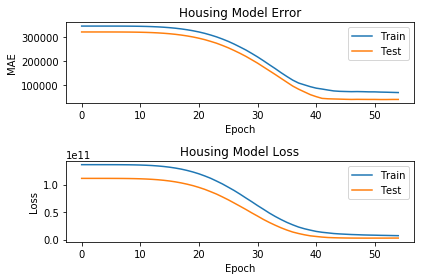

In [0]:
housing_fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(hm_hist.history['mean_absolute_error'])
plt.plot(hm_hist.history['val_mean_absolute_error'])
plt.title('Housing Model Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.subplot(2,1,2)
plt.plot(hm_hist.history['loss'])
plt.plot(hm_hist.history['val_loss'])
plt.title('Housing Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.tight_layout();

In [0]:
housing_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
dense (Dense)                (None, 50)                400       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 5,551
Trainable params: 5,551
Non-trainable params: 0
_________________________________________________________________


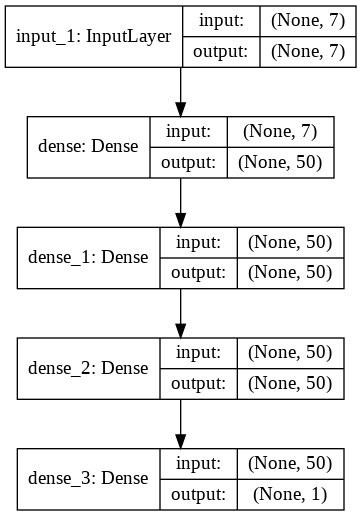

In [0]:
tf.keras.utils.plot_model(
    housing_model, 
    to_file='{}.png'.format(housing_model), 
    show_shapes=True, 
    show_layer_names=True
)

from IPython.display import Image
Image(retina=True, filename='{}.png'.format(housing_model))

# Binary Classification
Create a binary classifier for the titanic dataset, will person x survive?

In [0]:
!wget https://storage.googleapis.com/nicksdemobucket/titanic-train.csv

--2019-06-05 01:51:49--  https://storage.googleapis.com/nicksdemobucket/titanic-train.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [application/octet-stream]
Saving to: ‘titanic-train.csv.1’

titanic-train.csv.1 100%[===================>]  59.76K  --.-KB/s    in 0.001s  

2019-06-05 01:51:49 (70.9 MB/s) - ‘titanic-train.csv.1’ saved [61194/61194]



In [0]:
titanic_df = pd.read_csv('titanic-train.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data dictionary of Titanic dataset from Kaggle:

survival: Survival (0 = No, 1 = Yes)
pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
sex: Sex
Age: Age in years	
sibsp: # of siblings / spouses aboard the Titanic	
parch: # of parents / children aboard the Titanic	
ticket: Ticket number	
fare: Passenger fare	
cabin: Cabin number	
embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

From above quick data inspection, I would drop columns PassengerId, Name, Ticket, Cabin from analysis.
Cabin might be useful but since it has too many missing values, it won't help with training.
Pclass, Embarked are categorical data, I would create dummy variables of them.
SibSp + Parch indicates onboard family size, I would convert them to a single feature to indicate if the passenger IsAlone.

First, I'll have to deal with the missing values - I can either fill them up or drop the records with missing data or fill the missing value with mean / median or most represented class.

In [0]:
print(titanic_df.Age.mean())
print(titanic_df.Age.median())

29.69911764705882
28.0


In [0]:
#fill missing passenger age with median
titanic_df['Age'].fillna(titanic_df.Age.median(), 
                         inplace=True)

In [0]:
print(titanic_df.Embarked.mode())

0    S
dtype: object


In [0]:
#fill missing embarked port with most presented class
titanic_df['Embarked'].fillna(titanic_df.Embarked.mode(),
                             inplace=True)

In [0]:
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [0]:
print(titanic_df[titanic_df['Fare']==0.0].shape[0])

15


Assume the zero fares are missing data too. Replace with mean.

In [0]:
print(titanic_df.Fare.mean(skipna=True))

32.2042079685746


In [0]:
titanic_df.loc[titanic_df['Fare'] == 0, 'Fare'] = titanic_df.Fare.mean()

In [0]:
print(titanic_df[titanic_df['Fare']==0.0].shape[0])
print(titanic_df.Fare.mean(skipna=True))

0
32.74636635188393


In [0]:
#create new column IsAlone
titanic_df['IsAlone'] = 1
titanic_df.loc[(titanic_df['SibSp']+titanic_df['Parch'])>0, 'IsAlone'] = 0

In [0]:
#create dummy variables on Pclass and Embarked
titanic_df = pd.concat([titanic_df,
                        pd.get_dummies(titanic_df['Pclass'],
                                      prefix='Pclass')], 
                       axis=1)

titanic_df = pd.concat([titanic_df,
                        pd.get_dummies(titanic_df['Embarked'],
                                      prefix='Embarked')], 
                       axis=1)

In [0]:
#map sex to categorical : female=0, male=1
titanic_df['Sex_code'] = titanic_df.Sex.astype("category").cat.codes

In [0]:
titanic_df.loc[0:10, ['Sex', 'Sex_code']]

,Sex,Sex_code
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1
5,male,1
6,male,1
7,male,1
8,female,0
9,female,0


In [0]:
#normalize Fare and Age
titanic_df['Fare_norm'] = preprocessing.scale(titanic_df['Fare'])
titanic_df['Age_norm'] = preprocessing.scale(titanic_df['Age'])

In [0]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'IsAlone', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Sex_code', 'Fare_norm', 'Age_norm'],
      dtype='object')

In [0]:
titanic_drop_cols = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 
                     'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
titanic_new = titanic_df.drop(titanic_drop_cols, axis=1)

In [0]:
titanic_new.describe()

,Survived,IsAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_code,Fare_norm,Age_norm
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,8.910000e+02
mean,0.383838,0.602694,0.242424,0.206510,0.551066,0.188552,0.086420,0.722783,0.647587,-5.607187e-18,3.841546e-16
std,0.486592,0.489615,0.428790,0.405028,0.497665,0.391372,0.281141,0.447876,0.477990,1.000562e+00,1.000562e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.806408e-01,-2.224156e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.015788e-01,-5.657365e-01
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-3.565897e-01,-1.046374e-01
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-1.095569e-02,4.333115e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.691189e+00,3.891554e+00


In [0]:
from keras.utils import to_categorical

#create features and labels
titanic_features = titanic_new.drop(['Survived'], axis=1).values
titanic_labels = to_categorical(titanic_new['Survived']).astype('float32')

Using TensorFlow backend.


In [0]:
print(titanic_features.shape)
print(titanic_labels.shape)

(891, 10)
(891, 2)


In [0]:
#construct model
titanic_inputs = keras.Input(shape=(10,))
tl1 = Dense(50, kernel_initializer='uniform',
            activation='relu')(titanic_inputs)
tl2 = Dense(50, kernel_initializer='uniform',
            activation='relu')(tl1)
tl3 = Dense(50, kernel_initializer='uniform',
            activation='relu')(tl2)
titanic_outputs = Dense(2, activation='softmax')(tl3)

titanic_model = keras.Model(titanic_inputs, titanic_outputs)

titanic_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
tm_hist = titanic_model.fit(titanic_features, titanic_labels, 
                            epochs=50, batch_size=4,
                            validation_split=0.3, verbose=2,
                            callbacks=[EarlyStopping(patience=5)])

Train on 623 samples, validate on 268 samples
Epoch 1/50
 - 0s - loss: 0.6010 - acc: 0.6758 - val_loss: 0.4979 - val_acc: 0.7985
Epoch 2/50
 - 0s - loss: 0.4956 - acc: 0.7961 - val_loss: 0.4700 - val_acc: 0.8172
Epoch 3/50
 - 0s - loss: 0.4568 - acc: 0.8138 - val_loss: 0.4595 - val_acc: 0.8060
Epoch 4/50
 - 0s - loss: 0.4448 - acc: 0.8234 - val_loss: 0.4364 - val_acc: 0.8172
Epoch 5/50
 - 0s - loss: 0.4317 - acc: 0.8202 - val_loss: 0.4439 - val_acc: 0.8172
Epoch 6/50
 - 0s - loss: 0.4293 - acc: 0.8202 - val_loss: 0.4363 - val_acc: 0.8060
Epoch 7/50
 - 0s - loss: 0.4340 - acc: 0.8202 - val_loss: 0.4415 - val_acc: 0.8060
Epoch 8/50
 - 0s - loss: 0.4275 - acc: 0.8234 - val_loss: 0.4443 - val_acc: 0.8060
Epoch 9/50
 - 0s - loss: 0.4158 - acc: 0.8250 - val_loss: 0.4624 - val_acc: 0.8209
Epoch 10/50
 - 0s - loss: 0.4275 - acc: 0.8234 - val_loss: 0.4363 - val_acc: 0.8022
Epoch 11/50
 - 0s - loss: 0.4192 - acc: 0.8299 - val_loss: 0.4189 - val_acc: 0.8097
Epoch 12/50
 - 0s - loss: 0.4178 - acc:

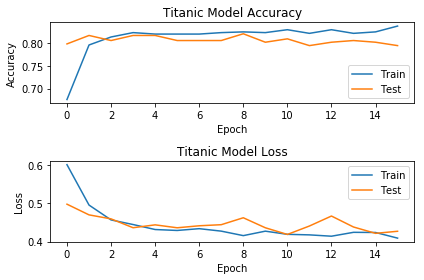

In [0]:
titanic_fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(tm_hist.history['acc'])
plt.plot(tm_hist.history['val_acc'])
plt.title('Titanic Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(tm_hist.history['loss'])
plt.plot(tm_hist.history['val_loss'])
plt.title('Titanic Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.tight_layout();

In [0]:
titanic_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 102       
Total params: 5,752
Trainable params: 5,752
Non-trainable params: 0
_________________________________________________________________


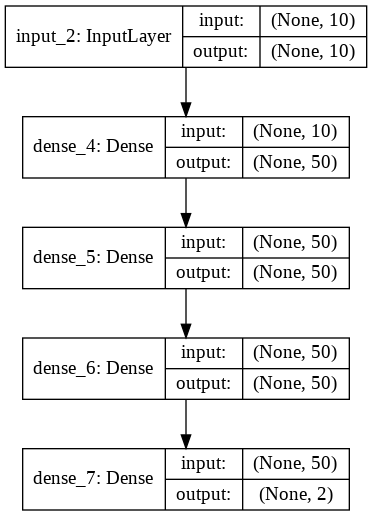

In [0]:
tf.keras.utils.plot_model(
    titanic_model, 
    to_file='{}.png'.format(titanic_model), 
    show_shapes=True, 
    show_layer_names=True
)

Image(retina=True, filename='{}.png'.format(titanic_model))

# MNIST
See how well a fully connected Neural Network performs on MNSIT

In [0]:
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [0]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [0]:
X_train = x_train.reshape(x_train.shape[0], 784).astype('float32')
X_test = x_test.reshape(x_test.shape[0], 784).astype('float32')

In [0]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


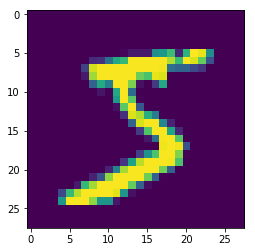

In [0]:
plt.imshow(x_train[0]);

In [0]:
X_train /= 255
X_test /= 255

In [0]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [0]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [0]:
from tensorflow.keras.layers import Dropout

mnist_inputs = keras.Input(shape=(784,))
ml1 = Dense(512, activation='relu')(mnist_inputs)
ml1 = Dropout(0.5)(ml1)
ml2 = Dense(256, activation='relu')(ml1)
ml2 = Dropout(0.25)(ml2)
mnist_outputs = Dense(10, activation='softmax')(ml2)

mnist_model = keras.Model(mnist_inputs, mnist_outputs)

mnist_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

mm_hist = mnist_model.fit(X_train, y_train, batch_size=128, 
                          epochs=30, verbose=2,
                          validation_data=(X_test, y_test),
                callbacks=[EarlyStopping(patience=5)])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 8s - loss: 0.3356 - acc: 0.8988 - val_loss: 0.1217 - val_acc: 0.9636
Epoch 2/30
 - 7s - loss: 0.1559 - acc: 0.9520 - val_loss: 0.0965 - val_acc: 0.9700
Epoch 3/30
 - 7s - loss: 0.1206 - acc: 0.9620 - val_loss: 0.0886 - val_acc: 0.9720
Epoch 4/30
 - 7s - loss: 0.1003 - acc: 0.9683 - val_loss: 0.0695 - val_acc: 0.9796
Epoch 5/30
 - 7s - loss: 0.0888 - acc: 0.9718 - val_loss: 0.0661 - val_acc: 0.9799
Epoch 6/30
 - 7s - loss: 0.0784 - acc: 0.9752 - val_loss: 0.0654 - val_acc: 0.9784
Epoch 7/30
 - 7s - loss: 0.0757 - acc: 0.9761 - val_loss: 0.0603 - val_acc: 0.9823
Epoch 8/30
 - 7s - loss: 0.0674 - acc: 0.9792 - val_loss: 0.0667 - val_acc: 0.9801
Epoch 9/30
 - 7s - loss: 0.0616 - acc: 0.9806 - val_loss: 0.0586 - val_acc: 0.9826
Epoch 10/30
 - 7s - loss: 0.0567 - acc: 0.9817 - val_loss: 0.0571 - val_acc: 0.9826
Epoc

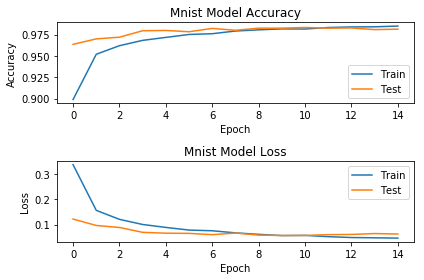

In [0]:
mnist_fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(mm_hist.history['acc'])
plt.plot(mm_hist.history['val_acc'])
plt.title('Mnist Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(mm_hist.history['loss'])
plt.plot(mm_hist.history['val_loss'])
plt.title('Mnist Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.tight_layout();

In [0]:
mnist_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


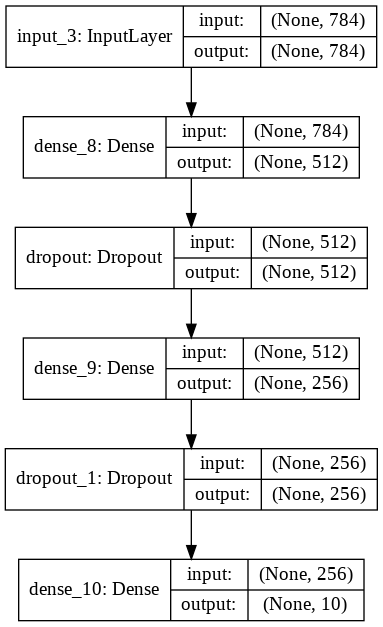

In [0]:
tf.keras.utils.plot_model(
    mnist_model, 
    to_file='{}.png'.format(mnist_model), 
    show_shapes=True, 
    show_layer_names=True
)

Image(retina=True, filename='{}.png'.format(mnist_model))